# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load the dataset


In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.665471,6.098382,16.0,26.3,30.4,34.7,53.1
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expenses,1338.0,NaN,NaN,NaN,13270.422414,12110.01124,1121.87,4740.2875,9382.03,16639.915,63770.43


In [7]:
# missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
# check duplicate
df = df.drop_duplicates()

In [9]:
df.shape

(1337, 7)

# EDA

C:\Users\HP\AppData\Local\Temp\ipykernel_12732\2710165600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax=axes[0], kde = False)
C:\Users\HP\AppData\Local\Temp\ipykernel_12732\2710165600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax=axes[0], kde = False)
C:\Users\HP\

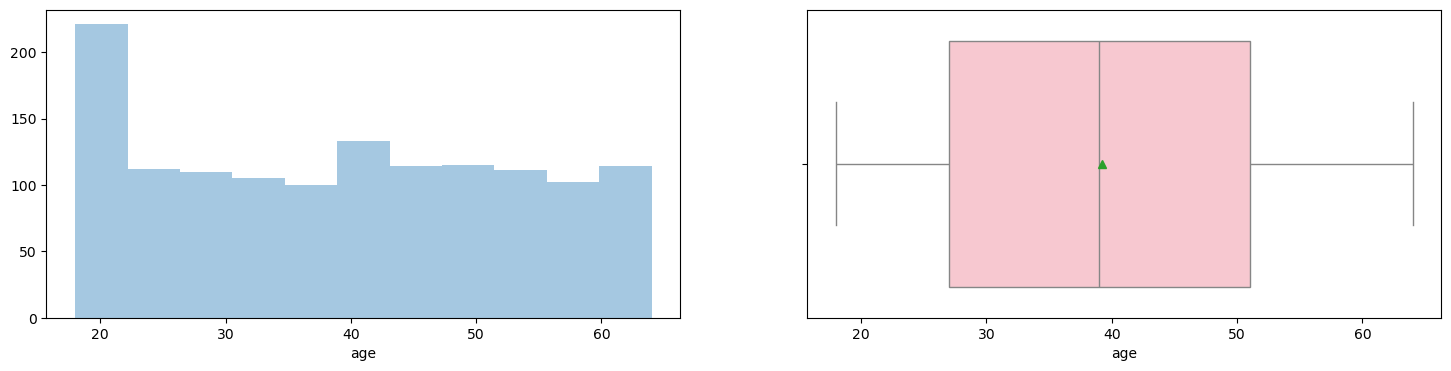

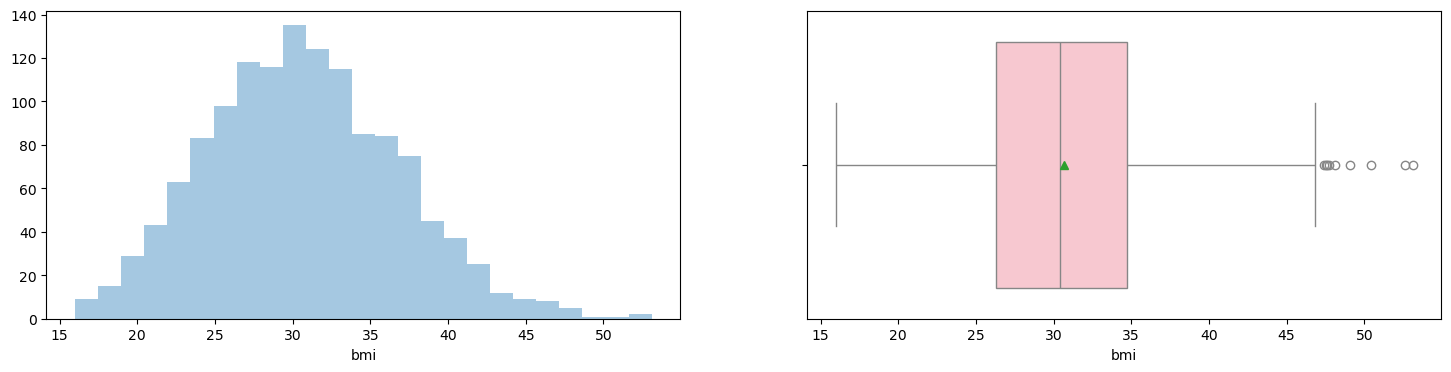

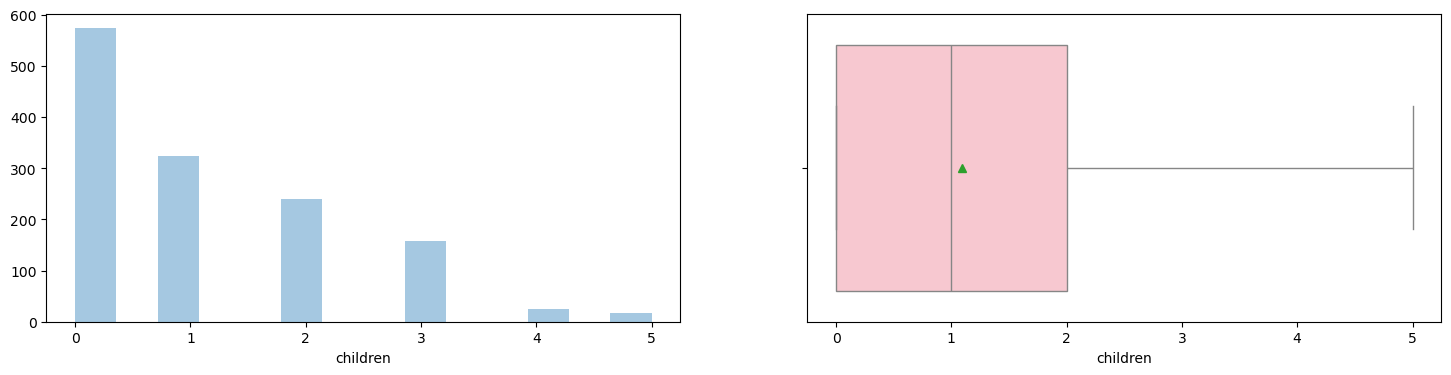

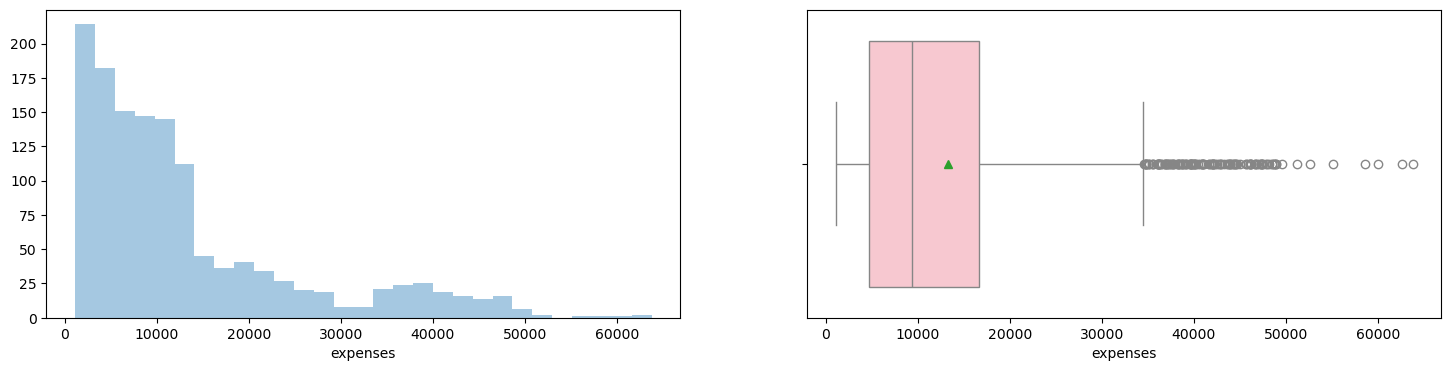

In [10]:
x_axis = ['age', 'bmi', 'children', 'expenses']
for x in x_axis:
    fig, axes = plt.subplots(1,2, figsize=(18,4))
    sns.distplot(df[x], ax=axes[0], kde = False)
    sns.boxplot(df[x], ax=axes[1], orient='h', showmeans = True, color='pink')
plt.show()

# handle categorical data

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [12]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [13]:
df['sex'] = df.sex.map({'female':0, 'male':1})
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [14]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [15]:
df['smoker'] = df.smoker.map({'yes':1, 'no':0})
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [16]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
df['region'] = df.region.map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [19]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
sex,1337.0,0.504862,0.500163,0.00,0.00,1.00,1.00,1.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
smoker,1337.0,0.204936,0.403806,0.00,0.00,0.00,0.00,1.00
region,1337.0,2.483919,1.105208,1.00,2.00,2.00,3.00,4.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


# Split the dataset into X and y

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [21]:
x = df.drop(['expenses'], axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [22]:
y = df.expenses
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
x_train.shape

(1069, 6)

In [25]:
x_test.shape

(268, 6)

# Model Training

In [26]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(x_test)

In [30]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [31]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred)
score1

0.8068280291899954

In [32]:
# Support vector regressor
from sklearn.svm import SVR

In [33]:
svm = SVR()

In [34]:
svm.fit(x_train, y_train)

SVR()

In [38]:
y_pred = svm.predict(x_test)
from sklearn.metrics import r2_score
score2 = r2_score(y_test, y_pred)
score2

-0.1344469486786597

In [36]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [37]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [39]:
y_pred = rf.predict(x_test)

score3 = r2_score(y_test, y_pred)
score3

0.8811073483069937

# final model is random forest regressor

In [40]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
# predict charges in new customer
data = {
    'age': 40,
    'sex': 1,
    'bmi': 40,
    'children': 3,
    'smoker': 1,
    'region': 2
}

new_df = pd.DataFrame(data, index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,40,1,40,3,1,2


In [44]:
pred = rf.predict(new_df)
pred[0]

42332.582300000024

In [45]:
# predict charges in new customer
data = {
    'age': 19,
    'sex': 0,
    'bmi': 27.9,
    'children': 0,
    'smoker': 1,
    'region': 1
}

new_df = pd.DataFrame(data, index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1


In [46]:
pred = rf.predict(new_df)
pred[0]

17167.460600000002

# Save model

In [47]:
import joblib
joblib.dump(rf, 'random_forest_regressor')

['random_forest_regressor']